<a href="https://colab.research.google.com/github/0x6f736f646f/computer-vision-ai-saturdays/blob/master/1stMonth%7BImageManipulation%7D/Notebook/Computer_Vision.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Computer Vision Example


## Start Coding

Let's start with our import of TensorFlow

In [1]:
import tensorflow as tf
print(tf.__version__)

1.15.0


We will train a neural network to recognize items of clothing from a common dataset called Fashion MNIST.

It contains 70,000 items of clothing in 10 different categories. Each item of clothing is in a 28x28 greyscale image.

The Fashion MNIST data is available directly in the tf.keras datasets API. You load it like this:

In [0]:
mnist = tf.keras.datasets.fashion_mnist

In [3]:
(training_images, training_labels), (test_images, test_labels) = mnist.load_data()

4423680/4422102 [==============================] - 0s 0us/step


9
[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   1   0   0  13  73   0
    0   1   4   0   0   0   0   1   1   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   3   0  36 136 127  62
   54   0   0   0   1   3   4   0   0   3]
 [  0   0   0   0   0   0   0   0   0   0   0   0   6   0 102 204 176 134
  144 123  23   0   0   0   0  12  10   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0 155 236 207 178
  107 156 161 109  64  23  77 130  72  15]
 [  0   0   0   0   0   0   0   0   0   0   0   1   0  69 207 223 218 216
  216 163 127 121 122 146 141  88 172  66]
 [  0   0   0   0   0   0   0   0   0   1   1   1   0 200 232 

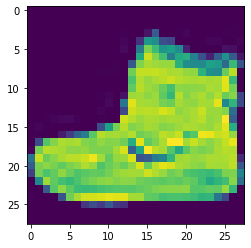

In [4]:
import matplotlib.pyplot as plt
plt.imshow(training_images[0])
print(training_labels[0])
print(training_images[0])

You'll notice that all of the values in the number are between 0 and 255. If we are training a neural network, for various reasons it's easier if we treat all values as between 0 and 1, a process called '**normalizing**'...and fortunately in Python it's easy to normalize a list like this without looping. You do it like this:

In [0]:
training_images  = training_images / 255.0
test_images = test_images / 255.0

Let's now design the model. There's quite a few new concepts here, but don't worry, you'll get the hang of them. 

In [0]:
model = tf.keras.models.Sequential([tf.keras.layers.Flatten(), 
                                    tf.keras.layers.Dense(128, activation=tf.nn.relu), 
                                    tf.keras.layers.Dense(10, activation=tf.nn.softmax)])

**Sequential**: That defines a SEQUENCE of layers in the neural network

**Flatten**: Remember earlier where our images were a square, when you printed them out? Flatten just takes that square and turns it into a 1 dimensional set.

**Dense**: Adds a layer of neurons

Each layer of neurons need an **activation function** to tell them what to do. There's lots of options, but just use these for now. 


In [7]:
model.compile(optimizer = tf.train.AdamOptimizer(),
              loss = 'sparse_categorical_crossentropy',
              metrics=['accuracy'])

model.fit(training_images, training_labels, epochs=5)

Instructions for updating:
If using Keras pass *_constraint arguments to layers.
Train on 60000 samples
Epoch 1/5
60000/60000 [==============================] - 6s 99us/sample - loss: 0.5015 - acc: 0.8249
Epoch 2/5
60000/60000 [==============================] - 5s 86us/sample - loss: 0.3768 - acc: 0.8637
Epoch 3/5
60000/60000 [==============================] - 5s 87us/sample - loss: 0.3380 - acc: 0.8767
Epoch 4/5
60000/60000 [==============================] - 5s 87us/sample - loss: 0.3139 - acc: 0.8849
Epoch 5/5
60000/60000 [==============================] - 5s 87us/sample - loss: 0.2973 - acc: 0.8912


In [8]:
model.evaluate(test_images, test_labels)

10000/10000 [==============================] - 1s 65us/sample - loss: 0.3388 - acc: 0.8762


[0.33880647621154786, 0.8762]

# Exploration Exercises

###Exercise 1:
For this first exercise run the below code: It creates a set of classifications for each of the test images, and then prints the first entry in the classifications. The output, after you run it is a list of numbers. Why do you think this is, and what do those numbers represent? 

In [9]:
classifications = model.predict(test_images)

print(classifications[0])

[3.5364146e-06 1.2886286e-06 7.3794531e-06 1.1644304e-05 3.9387719e-06
 6.9397013e-03 1.6717662e-05 8.1309311e-02 5.7281012e-04 9.1113365e-01]


Hint: try running print(test_labels[0]) -- and you'll get a 9. Does that help you understand why this list looks the way it does? 

In [10]:
print(test_labels[0])

9


### What does this list represent?


1.   It's 10 random meaningless values
2.   It's the first 10 classifications that the computer made
3.   It's the probability that this item is each of the 10 classes



####Answer: 
The correct answer is (3)

The output of the model is a list of 10 numbers. These numbers are a probability that the value being classified is the corresponding value, i.e. the first value in the list is the probability that the handwriting is of a '0', the next is a '1' etc. Notice that they are all VERY LOW probabilities.

For the 7, the probability was .999+, i.e. the neural network is telling us that it's almost certainly a 7.

##Exercise 2: 
Let's now look at the layers in your model. Experiment with different values for the dense layer with 512 neurons. What different results do you get for loss, training time etc? Why do you think that's the case? 



In [11]:
import tensorflow as tf
print(tf.__version__)

mnist = tf.keras.datasets.fashion_mnist

(training_images, training_labels) ,  (test_images, test_labels) = mnist.load_data()

training_images = training_images/255.0
test_images = test_images/255.0

model = tf.keras.models.Sequential([tf.keras.layers.Flatten(),
                                    tf.keras.layers.Dense(1024, activation=tf.nn.relu),
                                    tf.keras.layers.Dense(10, activation=tf.nn.softmax)])

model.compile(optimizer = 'adam',
              loss = 'sparse_categorical_crossentropy')

model.fit(training_images, training_labels, epochs=5)

model.evaluate(test_images, test_labels)

classifications = model.predict(test_images)

print(classifications[0])
print(test_labels[0])

1.15.0
Train on 60000 samples
Epoch 1/5
60000/60000 [==============================] - 6s 104us/sample - loss: 0.4725
Epoch 2/5
60000/60000 [==============================] - 6s 105us/sample - loss: 0.3580
Epoch 3/5
60000/60000 [==============================] - 6s 100us/sample - loss: 0.3242
Epoch 4/5
60000/60000 [==============================] - 6s 97us/sample - loss: 0.2961
Epoch 5/5
10000/10000 [==============================] - 1s 64us/sample - loss: 0.3522
[3.6306249e-06 4.7973748e-07 1.1509966e-09 8.6783658e-08 2.4499100e-08
 2.0969228e-04 8.8935474e-07 8.3968759e-02 6.2056779e-07 9.1581577e-01]
9


###Question 1. Increase to 1024 Neurons -- What's the impact?

1. Training takes longer, but is more accurate
2. Training takes longer, but no impact on accuracy
3. Training takes the same time, but is more accurate


####Answer
The correct answer is (1) by adding more Neurons we have to do more calculations, slowing down the process, but in this case they have a good impact -- we do get more accurate. That doesn't mean it's always a case of 'more is better', you can hit the law of diminishing returns very quickly!

##Exercise 3: 

What would happen if you remove the Flatten() layer. Why do you think that's the case? 

You get an error about the shape of the data. It may seem vague right now, but it reinforces the rule of thumb that the first layer in your network should be the same shape as your data. Right now our data is 28x28 images, and 28 layers of 28 neurons would be infeasible, so it makes more sense to 'flatten' that 28,28 into a 784x1. Instead of wriitng all the code to handle that ourselves, we add the Flatten() layer at the begining, and when the arrays are loaded into the model later, they'll automatically be flattened for us.

In [12]:
import tensorflow as tf
print(tf.__version__)

mnist = tf.keras.datasets.fashion_mnist

(training_images, training_labels) ,  (test_images, test_labels) = mnist.load_data()

training_images = training_images/255.0
test_images = test_images/255.0


model = tf.keras.models.Sequential([tf.keras.layers.Flatten(),
                                    tf.keras.layers.Dense(64, activation=tf.nn.relu),
                                    tf.keras.layers.Dense(10, activation=tf.nn.softmax)])

# This version has the 'flatten' removed. Replace the above with this one to see the error.
#model = tf.keras.models.Sequential([tf.keras.layers.Dense(64, activation=tf.nn.relu),
#                                    tf.keras.layers.Dense(10, activation=tf.nn.softmax)])


model.compile(optimizer = 'adam',
              loss = 'sparse_categorical_crossentropy')

model.fit(training_images, training_labels, epochs=5)

model.evaluate(test_images, test_labels)

classifications = model.predict(test_images)

print(classifications[0])
print(test_labels[0])

1.15.0
Train on 60000 samples
Epoch 1/5
60000/60000 [==============================] - 5s 79us/sample - loss: 0.5180
Epoch 2/5
60000/60000 [==============================] - 5s 80us/sample - loss: 0.3894
Epoch 3/5
60000/60000 [==============================] - 5s 78us/sample - loss: 0.3505
Epoch 4/5
60000/60000 [==============================] - 5s 78us/sample - loss: 0.3289
Epoch 5/5
10000/10000 [==============================] - 1s 57us/sample - loss: 0.3591
[7.6762162e-06 1.7848169e-08 6.3055245e-07 1.3701930e-08 2.4636711e-05
 1.9877762e-02 2.1787071e-05 3.5200533e-02 5.1352265e-05 9.4481552e-01]
9


##Exercise 4: 

Consider the final (output) layers. Why are there 10 of them? What would happen if you had a different amount than 10? For example, try training the network with 5

You get an error as soon as it finds an unexpected value. Another rule of thumb -- the number of neurons in the last layer should match the number of classes you are classifying for. In this case it's the digits 0-9, so there are 10 of them, hence you should have 10 neurons in your final layer.

In [13]:
import tensorflow as tf
print(tf.__version__)

mnist = tf.keras.datasets.fashion_mnist

(training_images, training_labels) ,  (test_images, test_labels) = mnist.load_data()

training_images = training_images/255.0
test_images = test_images/255.0

model = tf.keras.models.Sequential([tf.keras.layers.Flatten(),
                                    tf.keras.layers.Dense(64, activation=tf.nn.relu),
                                    tf.keras.layers.Dense(10, activation=tf.nn.softmax)])

# Replace the above model definiton with this one to see the network with 5 output layers
# And you'll see errors as a result!
# model = tf.keras.models.Sequential([tf.keras.layers.Flatten(),
#                                    tf.keras.layers.Dense(64, activation=tf.nn.relu),
#                                    tf.keras.layers.Dense(5, activation=tf.nn.softmax)])

model.compile(optimizer = 'adam',
              loss = 'sparse_categorical_crossentropy')

model.fit(training_images, training_labels, epochs=5)

model.evaluate(test_images, test_labels)

classifications = model.predict(test_images)

print(classifications[0])
print(test_labels[0])

1.15.0
Train on 60000 samples
Epoch 1/5
60000/60000 [==============================] - 5s 80us/sample - loss: 0.5163
Epoch 2/5
60000/60000 [==============================] - 5s 77us/sample - loss: 0.3888
Epoch 3/5
60000/60000 [==============================] - 5s 77us/sample - loss: 0.3524
Epoch 4/5
60000/60000 [==============================] - 5s 78us/sample - loss: 0.3295
Epoch 5/5
10000/10000 [==============================] - 1s 59us/sample - loss: 0.3732
[2.8677288e-05 3.2848725e-08 2.8622562e-05 4.1802773e-06 2.4257020e-05
 3.9351769e-02 6.2296436e-05 9.3420409e-02 3.6807763e-03 8.6339897e-01]
9


##Exercise 5: 

Consider the effects of additional layers in the network. What will happen if you add another layer between the one with 512 and the final layer with 10. 

Ans: There isn't a significant impact -- because this is relatively simple data. For far more complex data (including color images to be classified as flowers that you'll see in the next lesson), extra layers are often necessary. 

In [14]:
import tensorflow as tf
print(tf.__version__)

mnist = tf.keras.datasets.fashion_mnist

(training_images, training_labels) ,  (test_images, test_labels) = mnist.load_data()

training_images = training_images/255.0
test_images = test_images/255.0

model = tf.keras.models.Sequential([tf.keras.layers.Flatten(),
                                    tf.keras.layers.Dense(512, activation=tf.nn.relu),
                                    tf.keras.layers.Dense(256, activation=tf.nn.relu),
                                    tf.keras.layers.Dense(10, activation=tf.nn.softmax)])

model.compile(optimizer = 'adam',
              loss = 'sparse_categorical_crossentropy')

model.fit(training_images, training_labels, epochs=5)

model.evaluate(test_images, test_labels)

classifications = model.predict(test_images)

print(classifications[0])
print(test_labels[0])

1.15.0
Train on 60000 samples
Epoch 1/5
60000/60000 [==============================] - 6s 102us/sample - loss: 0.4732
Epoch 2/5
60000/60000 [==============================] - 6s 99us/sample - loss: 0.3598
Epoch 3/5
60000/60000 [==============================] - 6s 99us/sample - loss: 0.3217
Epoch 4/5
60000/60000 [==============================] - 6s 99us/sample - loss: 0.2980
Epoch 5/5
10000/10000 [==============================] - 1s 67us/sample - loss: 0.3435
[1.00444225e-07 9.57856628e-07 1.71419483e-08 2.34810997e-07
 1.51680499e-08 4.77670785e-03 2.72401621e-07 7.74221309e-03
 8.20514856e-07 9.87478614e-01]
9
